In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\Backup\Downloads\archive (9)\sample-data.csv")


In [4]:
# Step 3: Basic Info
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           500 non-null    int64 
 1   description  500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB
None
               id
count  500.000000
mean   250.500000
std    144.481833
min      1.000000
25%    125.750000
50%    250.500000
75%    375.250000
max    500.000000
id             0
description    0
dtype: int64


In [6]:
print(df.columns)


Index(['id', 'description'], dtype='object')


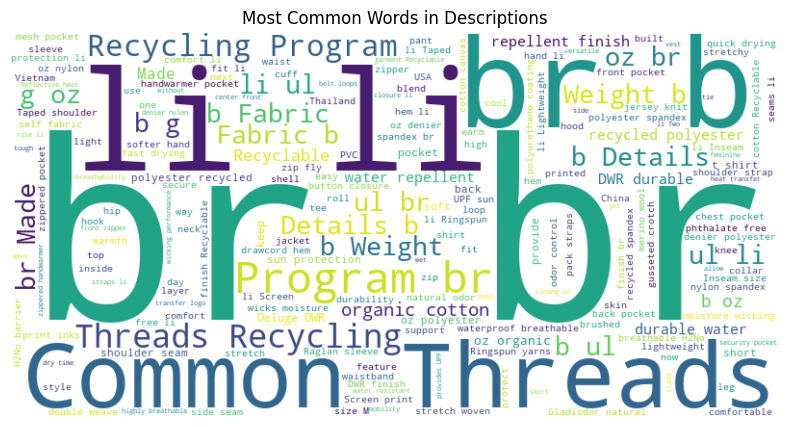

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

# Load data
df = pd.read_csv(r"D:/Backup/Downloads/archive (9)/sample-data.csv")  # Adjust path if needed

# Drop missing
df.dropna(subset=['description'], inplace=True)

# Combine all text
all_text = " ".join(df['description'].astype(str).tolist())

# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Descriptions")
plt.show()


In [10]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ------------------------------- ------ 524.3/624.3 kB 612.9 kB/s eta 0:00:01
   -------------------------------------- 624.3/624.3 kB 600.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 387.4 kB/s e


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from textblob import TextBlob


In [13]:
from textblob import TextBlob

# Define function to get polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment function
df['Sentiment_Polarity'] = df['description'].astype(str).apply(get_sentiment)

# Label as Positive, Negative, or Neutral
df['Sentiment_Label'] = df['Sentiment_Polarity'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Display a sample
df[['description', 'Sentiment_Polarity', 'Sentiment_Label']].head()


,description,Sentiment_Polarity,Sentiment_Label
0,Active classic boxers - There's a reason why o...,0.097222,Positive
1,Active sport boxer briefs - Skinning up Glory ...,0.078788,Positive
2,Active sport briefs - These superbreathable no...,0.008333,Positive
3,"Alpine guide pants - Skin in, climb ice, switc...",-0.007863,Negative
4,"Alpine wind jkt - On high ridges, steep ice an...",-0.022941,Negative


C:\Users\admin\AppData\Local\Temp\ipykernel_23068\601355465.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Label', data=df, palette='Set2')


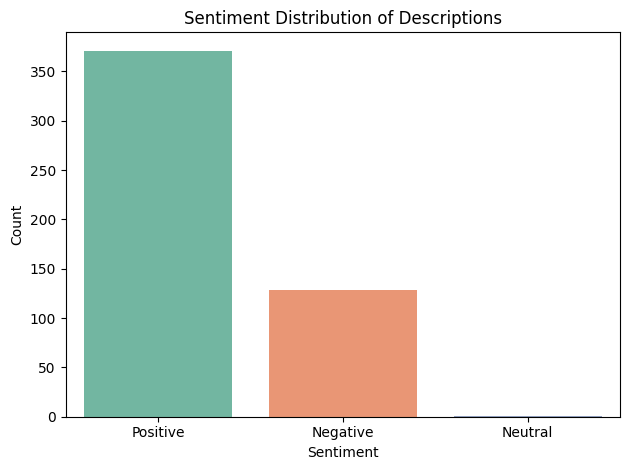

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment_Label', data=df, palette='Set2')
plt.title('Sentiment Distribution of Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
